# Segmentation depuis une représentation spatiale

1. Ouverture / visualisation des images
2. Visualisation des imagettes dans des espaces différents
3. Selection spatiale pour la segmentation

## 1. Ouverture / visualisation des images

In [1]:
from __future__ import print_function
from matplotlib.path import Path
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import hsv_to_rgb
from tqdm.notebook import tqdm
from random import shuffle
from skimage.io import imread, imshow

import numpy as np
import pprint
import os
import matplotlib.pyplot as plt
import cv2 as cv

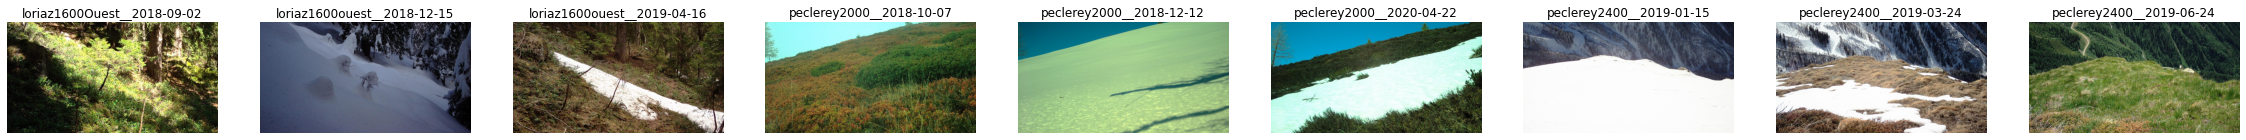

In [23]:
dir  = os.getcwd()
dir,__ = os.path.split(dir)
imgs_path = os.listdir(dir + '/data/Ref/Imgs')
imgs_path.sort()

imgs = []
for i in imgs_path:
    imgs.append(imread(f"{dir}/data/Ref/Imgs/{i}"))

fig, axs = plt.subplots(1, 9, figsize = (40, 10))
for i in range(len(imgs)):
    axs[i].imshow(imgs[i])
    axs[i].set_title(imgs_path[i][:-17])
    axs[i].set_axis_off()
plt.show()

## 2. Visualisation des imagettes dans des espaces différents

fin


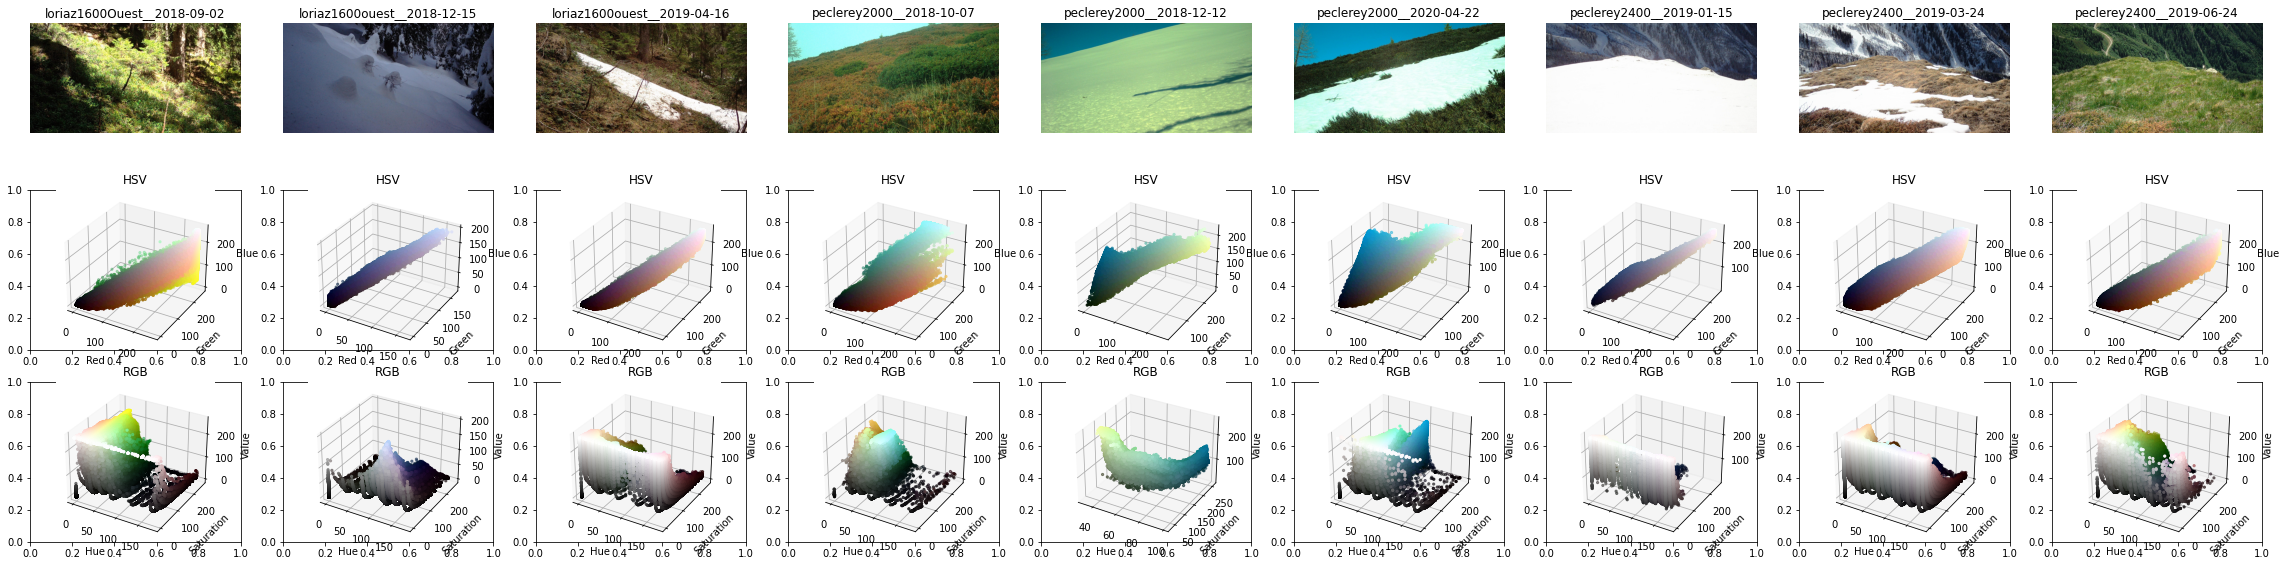

In [31]:
# OpenCV by default opens images in BGR color space
fig, axs = plt.subplots(3, 9, figsize = (40, 10))

for i, img in enumerate(imgs):
    # plot des images
    axs[0][i].imshow(img)
    axs[0][i].set_title(imgs_path[i][:-17])
    axs[0][i].set_axis_off()

    # plot RGB
    r, g, b = cv.split(img)
    plt.title("RGB")
    axs[1][i] = fig.add_subplot(3, 9, i+10, projection="3d")
    pixel_colors = img.reshape((np.shape(img)[0] * np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.0, vmax=1.0)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axs[1][i].scatter(
        r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
    )
    axs[1][i].set_xlabel("Red")
    axs[1][i].set_ylabel("Green")
    axs[1][i].set_zlabel("Blue")

    # plot HSV
    hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(hsv_img)
    plt.title("HSV")
    axs[2][i] = fig.add_subplot(3, 9, i+19, projection="3d")

    axs[2][i].scatter(
        h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
    )
    axs[2][i].set_xlabel("Hue")
    axs[2][i].set_ylabel("Saturation")
    axs[2][i].set_zlabel("Value")

print("fin")
# peut prendre jusqu'a 6 min
plt.show()

## 3. Selection spatiale pour la segmentation

In [27]:
def segment_neige(image):
    """Attempts to segment the clown fish out of the provided image."""
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    light_white = (0, 0, 100)
    dark_white = (170, 90, 255)
    final_mask = cv.inRange(hsv_image, light_white, dark_white)
    return final_mask.astype(bool)
results = [segment_neige(friend) for friend in imgs]

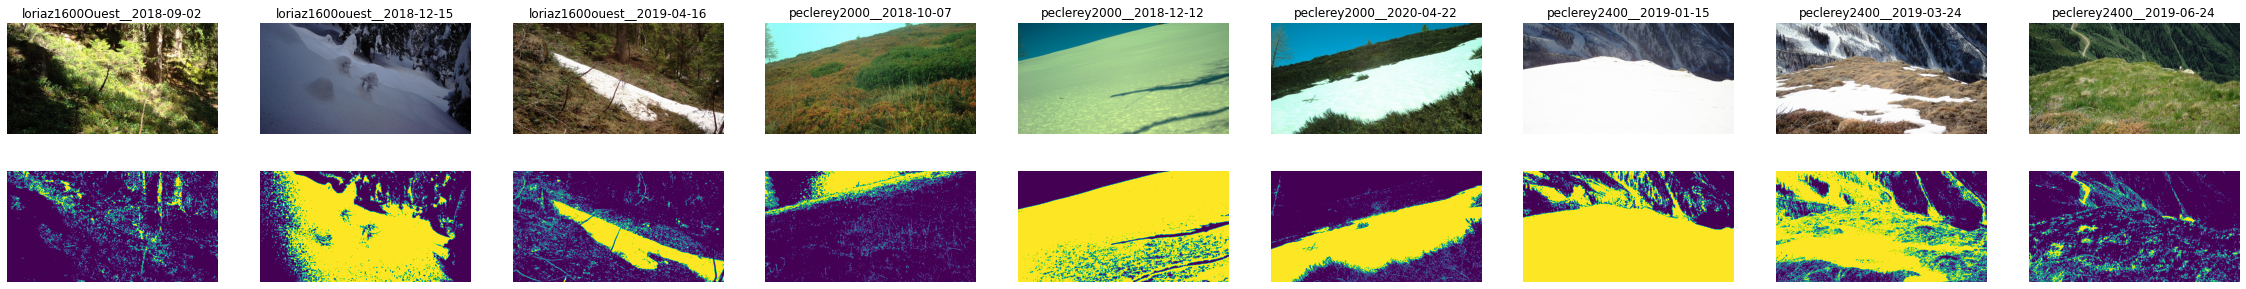

In [30]:
fig, axs = plt.subplots(2, 9, figsize = (40, 5))
for i, img in enumerate(imgs):
    axs[0][i].imshow(imgs[i])
    axs[0][i].set_title(imgs_path[i][:-17])
    axs[0][i].set_axis_off()

    axs[1][i].imshow(results[i])
    axs[1][i].set_axis_off()
plt.show()